<a href="https://colab.research.google.com/github/aayushsss1/Crimes-Against-Women-In-India/blob/main/Crimes_Against_Women(India).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crimes Against Women in India - data preprocessing

---



In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 8.3MB/s 
     |████████████████████████████████| 6.6MB 23.5MB/s 
     |████████████████████████████████| 15.4MB 200kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [3]:
df = pd.read_csv('crimes_against_women_2001-2014.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


In [5]:
df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


Dropping the extra unnecessary column - Unnamed: 0

In [6]:
df = df.drop(columns = 'Unnamed: 0')

In [7]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


Search for any Null Values in the dataset


In [8]:
df.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [9]:
df.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [10]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
    

We can see that there are repititions of various states, hence we bring them to one format by making everything lower case

In [12]:
df['STATE/UT'] = df['STATE/UT'].str.lower()

In [13]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhra pradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,andhra pradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,andhra pradesh,CHITTOOR,2001,27,34,14,112,83,186,0
3,andhra pradesh,CUDDAPAH,2001,20,20,17,126,38,57,0
4,andhra pradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [14]:
a=list(df['STATE/UT'].unique())
a.sort()
print(a)

['a & n islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'd & n haveli', 'daman & diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


In [15]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

#Plotting the various crimes committed against women, throughout the years (2001-2014)

In [16]:
df1=df.groupby(df['Year'])['Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls'].sum()
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228
2002,32746,29012,13644,67886,20310,98474,152
2003,31694,26592,12416,65878,24650,101406,92
2004,36466,31156,14052,69134,20002,116242,178
2005,36718,31500,13574,68350,19968,116638,298
2006,38696,34828,15236,73234,19932,126256,134
2007,41474,40832,16186,77468,21900,151860,122
2008,42934,45878,16344,80826,24428,162688,134
2009,42794,51482,16766,77422,22018,179092,96


Text(0.5, 1.0, 'Crimes against women over the years')

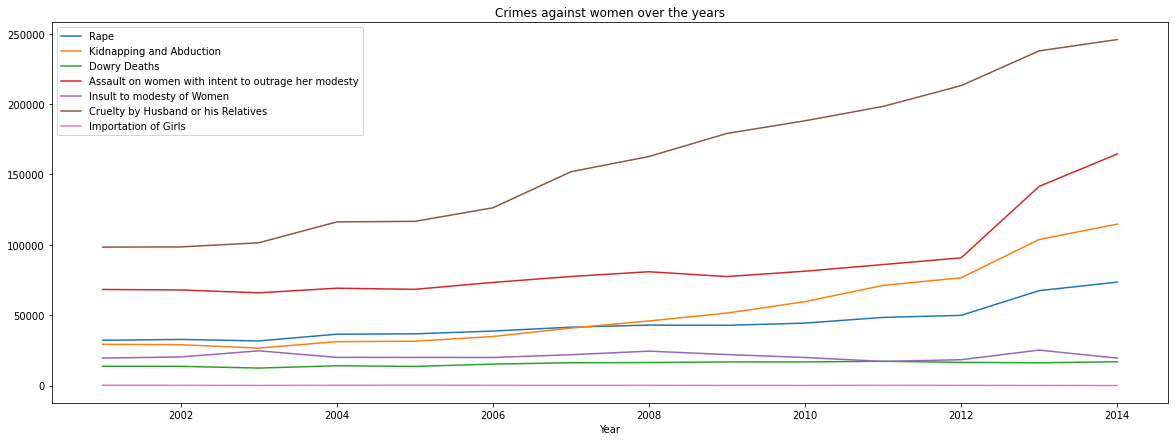

In [17]:
df1.plot(kind = 'line', figsize=(20, 7))
plt.title('Crimes against women over the years')

We can see that crimes have infact risen in a span of 12 years, with domestic violence taking a sharp increase

#Plotting a bar graph to show the total increase in crimes throughout the years

In [18]:
df['Total']=df['Rape']+df['Dowry Deaths'] +df['Kidnapping and Abduction']+df['Assault on women with intent to outrage her modesty']+df['Insult to modesty of Women']+df['Cruelty by Husband or his Relatives']+df['Importation of Girls']

In [19]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,andhra pradesh,ADILABAD,2001,50,30,16,149,34,175,0,454
1,andhra pradesh,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,andhra pradesh,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,andhra pradesh,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,andhra pradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


In [20]:
df2 = df[['Year']]

In [21]:
df2.head()

,Year
0,2001
1,2001
2,2001
3,2001
4,2001


In [22]:
df2['Total'] = df['Total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df2.head()

,Year,Total
0,2001,454
1,2001,356
2,2001,456
3,2001,278
4,2001,475


In [24]:
df2 = df2.groupby(df2['Year'])['Total'].sum()

In [25]:
df2.head(20)

Year
2001    261450
2002    262224
2003    262728
2004    287230
2005    287046
2006    308316
2007    349842
2008    373232
2009    389670
2010    410018
2011    438284
2012    465056
2013    591792
2014    634722
Name: Total, dtype: int64

Text(0.5, 1.0, 'Total Crimes commited against women over the years')

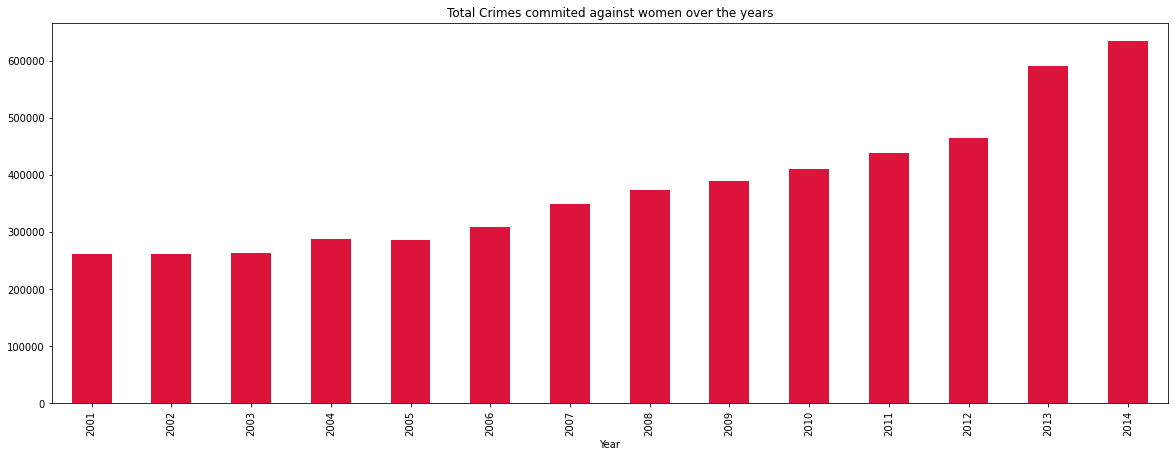

In [26]:
df2.plot(kind = 'bar', figsize=(20, 7), color = 'crimson')
plt.title('Total Crimes commited against women over the years')

#Plotting a bar graph to depict the extent of crimes commited in various Indian States

In [37]:
df2 = df.groupby(df['STATE/UT'])['Total'].sum().sort_values(ascending = True)

In [38]:
df2.head()

STATE/UT
lakshadweep       54
daman & diu      230
d & n haveli     566
nagaland        1072
sikkim          1482
Name: Total, dtype: int64

Text(0.5, 1.0, 'Total Crimes commited against women across States')

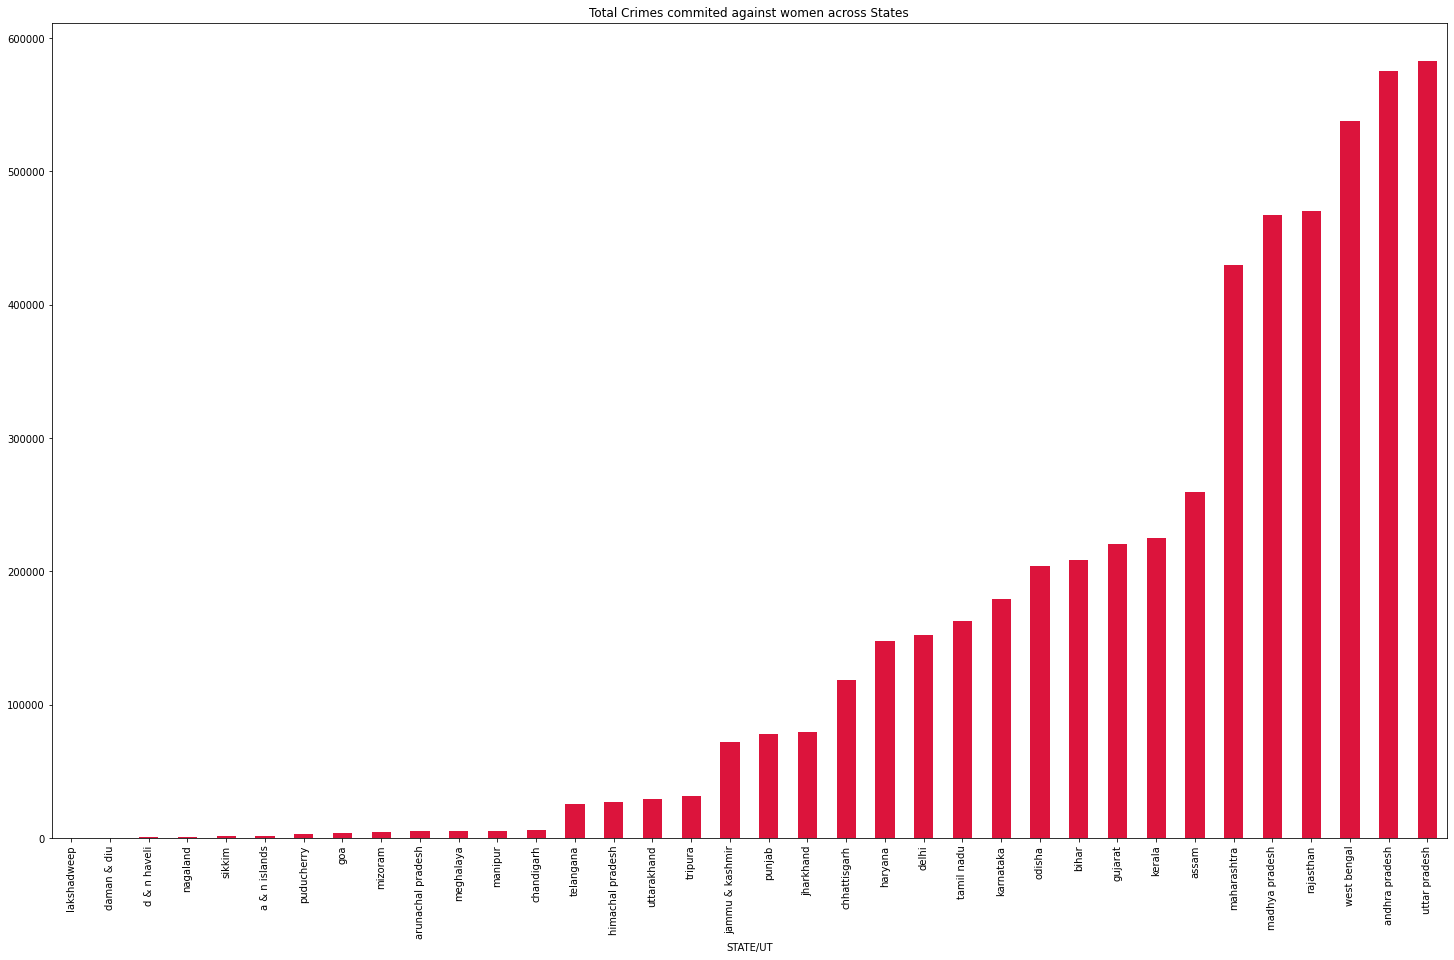

In [39]:
df2.plot(kind = 'bar', figsize=(25, 15), color = 'crimson')
plt.title('Total Crimes commited against women across States')

From the Bar graph we can see that the state Uttar Pradesh has the most of number of crimes commited against women, followed by Andhra Pradesh

#Depicting the total number of crimes commited against women, on the Indian Map

In [30]:
df3=df.groupby(df['STATE/UT'])['Total'].sum().to_frame(name = 'Total').reset_index()

In [31]:
df3.head(36)

,STATE/UT,Total
0,a & n islands,1568
1,andhra pradesh,575354
2,arunachal pradesh,5312
3,assam,259364
4,bihar,208376
5,chandigarh,6052
6,chhattisgarh,118386
7,d & n haveli,566
8,daman & diu,230
9,delhi,152162


,geometry
0,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
5,"POLYGON ((76.80293 30.67548, 76.79437 30.66932..."
6,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
7,"POLYGON ((73.02468 20.09630, 73.01955 20.10502..."
8,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20..."
9,"POLYGON ((77.32713 28.68516, 77.32539 28.68250..."


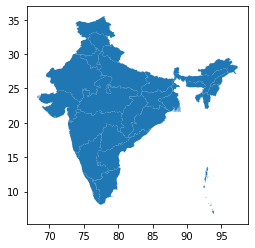

In [32]:
fp = "IND_adm1.shx"
map_df = gpd.read_file(fp)
map_df.plot()
map_df.head(36)

In [33]:
merged = map_df.join(df3)
merged = merged[['STATE/UT', 'geometry', 'Total']]
merged.head(36)

,STATE/UT,geometry,Total
0,a & n islands,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",1568
1,andhra pradesh,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",575354
2,arunachal pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",5312
3,assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",259364
4,bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",208376
5,chandigarh,"POLYGON ((76.80293 30.67548, 76.79437 30.66932...",6052
6,chhattisgarh,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",118386
7,d & n haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502...",566
8,daman & diu,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",230
9,delhi,"POLYGON ((77.32713 28.68516, 77.32539 28.68250...",152162


In [34]:
variable = 'Total'

In [35]:
vmin = 0
vmax = merged['Total'].max()

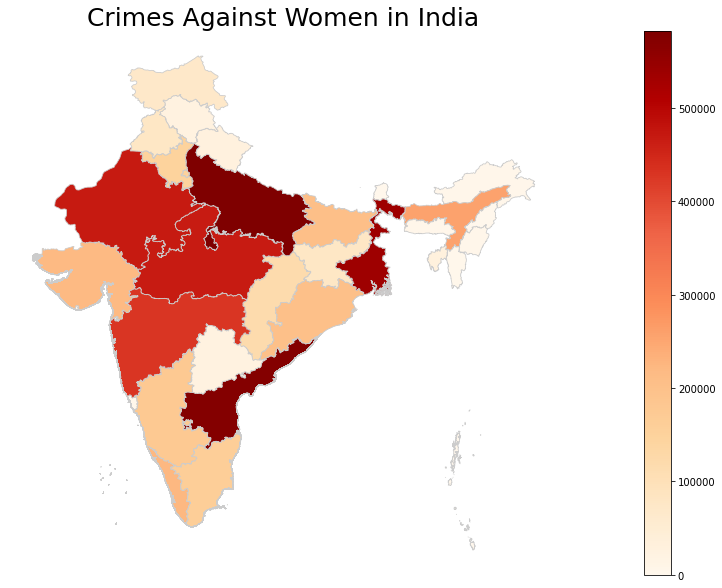

In [36]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Crimes Against Women in India', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='OrRd',norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([]) 
fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()

We can see that the dark red coloured regions - Uttar Pradesh, Andhra Pradesh and West Bengal are the 3 states with a very high crime rate